In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

In [5]:
### should we find a way to host this CSV somewhere that we can use a universal link, instead of a local file?

scores = pd.read_csv('/Users/richiebubbs/Downloads/sf-restaurant-scores-lives-standard/restaurant-scores-lives-standard.csv')

In [6]:
scores.head(10)

## inspection - data set seems to already be translsated to NaN for nulls

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,93268,Harbor Court Hotel,165 Steuart St.,San Francisco,CA,94105,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70142,Rosa Mexicano,30 Mission St,San Francisco,CA,94105,NaN,NaN,NaN,NaN,...,Reinspection/Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2326,IRMA'S PAMPANGA RESTAURANT,2901 16th St,San Francisco,CA,94103,37.765123,-122.417919,"{'longitude': '-122.417919', 'latitude': '37.7...",1.415563e+10,...,Reinspection/Followup,NaN,NaN,NaN,19.0,4.0,7.0,8.0,28859.0,20.0
3,98974,Brickhouse,426 BRANNAN ST,San Francisco,CA,94107,NaN,NaN,NaN,1.415839e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,99342,LAI HONG RESTAURANT,1416 POWELL ST,San Francisco,CA,94133,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,95754,Fools Errand,639 Divisadero St A,San Francisco,CA,94117,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,95754_20190327_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
6,77005,MoBowL,428 11th St,San Francisco,CA,94103,NaN,NaN,NaN,1.415964e+10,...,Routine - Unscheduled,77005_20170429_103120,Moderate risk food holding temperature,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
7,79804,CurveBall,428 11th St,San Francisco,CA,94103,NaN,NaN,NaN,1.415029e+10,...,Structural Inspection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18514,Yucatasia Deli & Sandwich,2164 Mission St,San Francisco,CA,94110,37.762366,-122.419491,"{'longitude': '-122.419491', 'latitude': '37.7...",NaN,...,Complaint,NaN,NaN,NaN,19.0,4.0,7.0,8.0,28859.0,20.0
9,71440,"New Garden Restaurant, Inc.",716 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,71440_20190401_103150,Improper or defective plumbing,Low Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
for i in scores.columns:

    try:
        scores.loc[scores[i]==r'\N',i] = np.nan
    except:
        print('nothing')
        
### also tried this code snippet from class to ensure all nulls are stored as Nan

nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing


/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [8]:
scores.dtypes

### looks like we already have the fields we need stored numerically

business_id                    int64
business_name                 object
business_address              object
business_city                 object
business_state                object
business_postal_code          object
business_latitude            float64
business_longitude           float64
business_location             object
business_phone_number        float64
inspection_id                 object
inspection_date               object
inspection_score             float64
inspection_type               object
violation_id                  object
violation_description         object
risk_category                 object
Neighborhoods                float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Zip Codes                    float64
Analysis Neighborhoods       float64
dtype: object

In [9]:
score_distro = scores.groupby(['inspection_score'],as_index=False)['inspection_score'].agg({'inspection_id':'count'})

## using this just to check the distribution of inspection scores

In [10]:
score_distro = score_distro.rename({'inspection_id':'count'},axis=1)

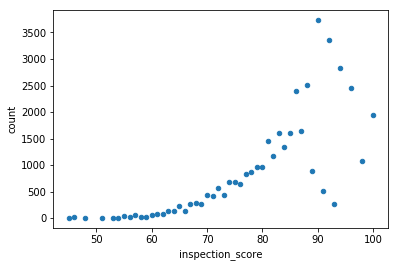

In [11]:
score_distro.plot.scatter(x='inspection_score',y='count')


### looks pretty rare that restaurants get below 70 

In [12]:
chains = scores.dropna(subset = ['inspection_score']).groupby(['business_name'],as_index=False).agg({'business_id':'nunique','inspection_score':'median'})

chains = chains.rename({'business_id':'count','inspection_score':'median_score'},axis=1)

## using this to see which restaurants have multiple locations (ie likely chains)
## median instead of average to help control for the influence of outlier scores on the average

In [13]:
chains.sort_values('count', ascending=False)

### order by descending to see which have highest locations

,business_name,count,median_score
3397,Peet's Coffee & Tea,20,94.0
4151,Starbucks Coffee,13,96.0
2183,Jamba Juice,10,92.0
2828,McDonald's,10,92.0
3533,Proper Food,9,98.0
3849,STARBUCKS,9,92.0
4110,Specialty's Cafe & Bakery,9,90.0
2910,Mixt Greens/Mixt,8,87.0
4951,Whole Foods Market,7,90.0
4604,The Organic Coup,7,98.0


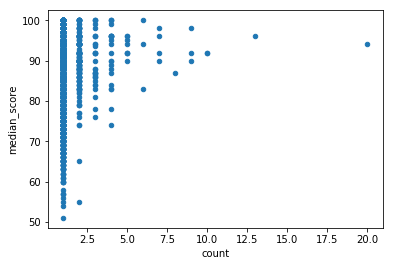

In [14]:
chains.plot.scatter(x='count',y='median_score')

## it appears chains tend to score higher than non chains

In [15]:
print(smf.ols('median_score ~ count',data=chains).fit().summary())

### however, regression implies that chains do not have a major effect on score (only 0.5 points)

                            OLS Regression Results                            
Dep. Variable:           median_score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     10.29
Date:                Sun, 05 May 2019   Prob (F-statistic):            0.00135
Time:                        10:40:23   Log-Likelihood:                -17715.
No. Observations:                5095   AIC:                         3.543e+04
Df Residuals:                    5093   BIC:                         3.545e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     88.3720      0.233    379.292      0.0

In [18]:
income_data = pd.read_csv('/Users/richiebubbs/Downloads/Zipcode_Income_Data2.csv')

In [19]:
income_data

,Neighborhood,business_postal_code,Per_Capita_Income,Median_Household_income
0,Bayview/Hunter's Point,94124,19484.0,43151.0
1,Bernal Heights,94110,41317.0,85607.0
2,Castro/Upper Market,94114,67206.0,92237.0
3,Chinatown,94108,18573.0,17630.0
4,Excelsior,94134,23562.0,67405.0
5,Financial District/South Beach,94111,70997.0,NaN
6,Haight Ashbury,94117,57953.0,85548.0
7,Inner Sunset,94122,39110.0,85696.0
8,Lakeshore,94132,32513.0,62917.0
9,Marina,94123,87353.0,102450.0


In [21]:
income_data.dtypes

Neighborhood                object
business_postal_code         int64
Per_Capita_Income          float64
Median_Household_income    float64
dtype: object

In [27]:
scores2 = scores.dropna()

In [34]:
scores2['business_postal_code'] = scores2['business_postal_code'].astype(int)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
scores3 = scores2

In [32]:
scores3

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,violation_id,violation_description,risk_category,Neighborhoods,Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods,busines_postal_code
11,62064,California Grocery,123 Eddy St,San Francisco,CA,94102,37.784303,-122.409647,"{'longitude': '-122.409647', 'latitude': '37.7...",1.415545e+10,...,62064_20171016_103131,Moderate risk vermin infestation,Moderate Risk,36.0,10.0,9.0,14.0,28852.0,36.0,94102
33,61989,Osha Thai Restaurant & Lounge,311 03rd St,San Francisco,CA,94107,37.783662,-122.398704,"{'longitude': '-122.398704', 'latitude': '37.7...",1.415590e+10,...,61989_20190307_103118,Employee eating or smoking,Moderate Risk,6.0,2.0,9.0,6.0,28856.0,8.0,94107
59,63082,The Brick Yard,1787 Union St,San Francisco,CA,94123,37.797933,-122.428627,"{'longitude': '-122.428627', 'latitude': '37.7...",1.415668e+10,...,63082_20180731_103114,High risk vermin infestation,High Risk,17.0,9.0,1.0,13.0,57.0,13.0,94123
78,3862,IMPERIAL GARDEN SEAFOOD RESTAURANT,2626 SAN BRUNO Ave,San Francisco,CA,94134,37.728458,-122.403991,"{'longitude': '-122.403991', 'latitude': '37.7...",1.415547e+10,...,3862_20170905_103156,Permit license or inspection report not posted,Low Risk,28.0,3.0,7.0,10.0,309.0,25.0,94134
173,7216,El Chico Produce Market #2,4600 Mission St,San Francisco,CA,94112,37.724489,-122.435026,"{'longitude': '-122.435026', 'latitude': '37.7...",1.415559e+10,...,7216_20160924_103139,Improper food storage,Low Risk,25.0,7.0,6.0,9.0,28861.0,28.0,94112
196,2766,TAQUERIA GUADALAJARA,4798 MISSION,San Francisco,CA,94112,37.721191,-122.437550,"{'longitude': '-122.43755', 'latitude': '37.72...",1.415555e+10,...,2766_20160502_103109,Unclean or unsanitary food contact surfaces,High Risk,25.0,7.0,6.0,9.0,28861.0,28.0,94112
261,4797,"Good Life Grocery, The",448 CORTLAND Ave,San Francisco,CA,94110,37.739053,-122.416683,"{'longitude': '-122.416683', 'latitude': '37.7...",1.415564e+10,...,4797_20170502_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,2.0,7.0,7.0,2.0,28859.0,2.0,94110
411,5847,John Muir Elementary School,380 Webster St,San Francisco,CA,94117,37.774046,-122.429076,"{'longitude': '-122.429076', 'latitude': '37.7...",1.415525e+10,...,5847_20180405_103161,Low risk vermin infestation,Low Risk,10.0,9.0,11.0,7.0,28852.0,9.0,94117
592,587,NEW TSING TAO RESTAURANT,811 ULLOA St,San Francisco,CA,94127,37.740654,-122.465389,"{'longitude': '-122.465389', 'latitude': '37.7...",1.415557e+10,...,587_20181203_103102,Unclean hands or improper use of gloves,High Risk,40.0,8.0,4.0,1.0,59.0,41.0,94127
1140,1362,RESTAURANTE FAMILIAR,4499 MISSION St,San Francisco,CA,94112,37.726402,-122.433476,"{'longitude': '-122.433476', 'latitude': '37.7...",1.415534e+10,...,1362_20160720_103105,Improper cooling methods,High Risk,5.0,7.0,6.0,9.0,28861.0,7.0,94112


In [36]:
scores3.dtypes

business_id                    int64
business_name                 object
business_address              object
business_city                 object
business_state                object
business_postal_code           int64
business_latitude            float64
business_longitude           float64
business_location             object
business_phone_number        float64
inspection_id                 object
inspection_date               object
inspection_score             float64
inspection_type               object
violation_id                  object
violation_description         object
risk_category                 object
Neighborhoods                float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Zip Codes                    float64
Analysis Neighborhoods       float64
busines_postal_code            int64
dtype: object

In [37]:
combo = scores2.merge(income_data, on = 'business_postal_code', how = 'left')

In [38]:
combo

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,Neighborhoods,Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods,busines_postal_code,Neighborhood,Per_Capita_Income,Median_Household_income
0,62064,California Grocery,123 Eddy St,San Francisco,CA,94102,37.784303,-122.409647,"{'longitude': '-122.409647', 'latitude': '37.7...",1.415545e+10,...,36.0,10.0,9.0,14.0,28852.0,36.0,94102,San Francisco,44373.0,70040.0
1,61989,Osha Thai Restaurant & Lounge,311 03rd St,San Francisco,CA,94107,37.783662,-122.398704,"{'longitude': '-122.398704', 'latitude': '37.7...",1.415590e+10,...,6.0,2.0,9.0,6.0,28856.0,8.0,94107,Potrero Hill,58650.0,98198.0
2,63082,The Brick Yard,1787 Union St,San Francisco,CA,94123,37.797933,-122.428627,"{'longitude': '-122.428627', 'latitude': '37.7...",1.415668e+10,...,17.0,9.0,1.0,13.0,57.0,13.0,94123,Marina,87353.0,102450.0
3,3862,IMPERIAL GARDEN SEAFOOD RESTAURANT,2626 SAN BRUNO Ave,San Francisco,CA,94134,37.728458,-122.403991,"{'longitude': '-122.403991', 'latitude': '37.7...",1.415547e+10,...,28.0,3.0,7.0,10.0,309.0,25.0,94134,Excelsior,23562.0,67405.0
4,3862,IMPERIAL GARDEN SEAFOOD RESTAURANT,2626 SAN BRUNO Ave,San Francisco,CA,94134,37.728458,-122.403991,"{'longitude': '-122.403991', 'latitude': '37.7...",1.415547e+10,...,28.0,3.0,7.0,10.0,309.0,25.0,94134,Visitacion Valley,17651.0,44373.0
5,7216,El Chico Produce Market #2,4600 Mission St,San Francisco,CA,94112,37.724489,-122.435026,"{'longitude': '-122.435026', 'latitude': '37.7...",1.415559e+10,...,25.0,7.0,6.0,9.0,28861.0,28.0,94112,Outer Mission,32002.0,79477.0
6,2766,TAQUERIA GUADALAJARA,4798 MISSION,San Francisco,CA,94112,37.721191,-122.437550,"{'longitude': '-122.43755', 'latitude': '37.72...",1.415555e+10,...,25.0,7.0,6.0,9.0,28861.0,28.0,94112,Outer Mission,32002.0,79477.0
7,4797,"Good Life Grocery, The",448 CORTLAND Ave,San Francisco,CA,94110,37.739053,-122.416683,"{'longitude': '-122.416683', 'latitude': '37.7...",1.415564e+10,...,2.0,7.0,7.0,2.0,28859.0,2.0,94110,Bernal Heights,41317.0,85607.0
8,4797,"Good Life Grocery, The",448 CORTLAND Ave,San Francisco,CA,94110,37.739053,-122.416683,"{'longitude': '-122.416683', 'latitude': '37.7...",1.415564e+10,...,2.0,7.0,7.0,2.0,28859.0,2.0,94110,Mission,37667.0,63623.0
9,5847,John Muir Elementary School,380 Webster St,San Francisco,CA,94117,37.774046,-122.429076,"{'longitude': '-122.429076', 'latitude': '37.7...",1.415525e+10,...,10.0,9.0,11.0,7.0,28852.0,9.0,94117,Haight Ashbury,57953.0,85548.0


In [40]:
combo.columns

Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_id', 'violation_description',
       'risk_category', 'Neighborhoods', 'Police Districts',
       'Supervisor Districts', 'Fire Prevention Districts', 'Zip Codes',
       'Analysis Neighborhoods', 'busines_postal_code', 'Neighborhood',
       'Per_Capita_Income', 'Median_Household_income'],
      dtype='object')

# Scatterplot of Inspection Score as function of Median Household Income

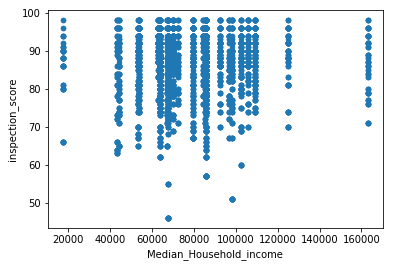

In [41]:
combo.plot.scatter(x='Median_Household_income',y='inspection_score')

# Scatterplot of Inspection Score as function of PerCapita Income

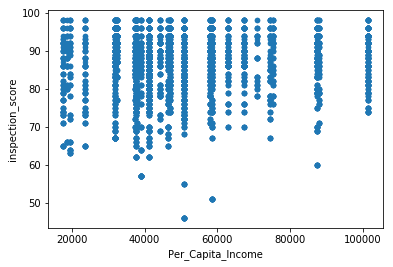

In [42]:
combo.plot.scatter(x='Per_Capita_Income',y='inspection_score')

# Regression of Inspection Score as function of Income:
## Median Househould:

In [43]:
print(smf.ols('inspection_score ~ Median_Household_income',data=combo).fit().summary())

                            OLS Regression Results                            
Dep. Variable:       inspection_score   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     25.53
Date:                Sun, 05 May 2019   Prob (F-statistic):           4.45e-07
Time:                        11:11:45   Log-Likelihood:                -27232.
No. Observations:                7697   AIC:                         5.447e+04
Df Residuals:                    7695   BIC:                         5.448e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

## Per Capita Income:

In [44]:
print(smf.ols('inspection_score ~ Per_Capita_Income',data=combo).fit().summary())

                            OLS Regression Results                            
Dep. Variable:       inspection_score   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     48.77
Date:                Sun, 05 May 2019   Prob (F-statistic):           3.11e-12
Time:                        11:12:48   Log-Likelihood:                -28067.
No. Observations:                7947   AIC:                         5.614e+04
Df Residuals:                    7945   BIC:                         5.615e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            84.0462      0.25